https://datahub.io/core/house-prices-uk
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

In [3]:
series = pd.read_csv(r'house_prices\data.csv')
series=series.drop(columns=['Date', 'Change (All)', 'Price (New)', 'Change (New)', 'Price (Modern)', 'Change (Modern)', 'Price (Older)', 'Change (Older)'])
display(series)

,Price (All)
0,1891
1,1891
2,1891
3,1881
4,1872
...,...
256,205937
257,206665
258,209971
259,211672


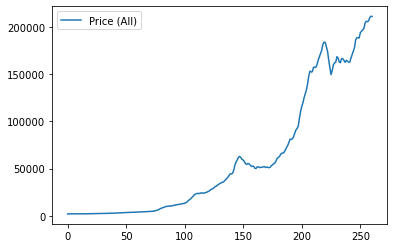

In [8]:
series.plot()
plt.show()

## Diferenciação - p/ ver quantas diferenciações até ter uma série estacionária - 1 parece ok

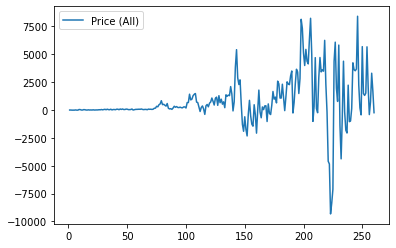

In [6]:
series.diff(periods=1).plot()
plt.show()

## Autocorrelação

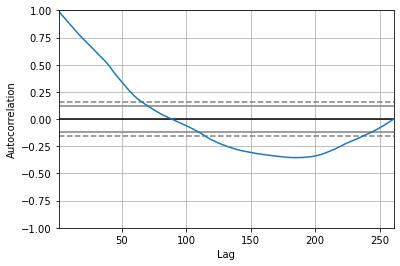

In [7]:
pd.plotting.autocorrelation_plot(series)
plt.show()

### Observa-se uma autocorrelação positiva de 0 a ~70, um bom chute inicial para AR seria ~40

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

## ARIMA simples

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:            Price (All)   No. Observations:                  261
Model:                ARIMA(40, 1, 0)   Log Likelihood               -2165.523
Date:                Wed, 01 Sep 2021   AIC                           4413.045
Time:                        01:01:43   BIC                           4559.033
Sample:                             0   HQIC                          4471.734
                                - 261                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0445      0.064     16.295      0.000       0.919       1.170
ar.L2         -0.3370      0.105     -3.213      0.001      -0.543      -0.131
ar.L3          0.0653      0.109      0.598      0.5

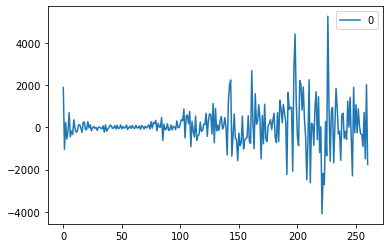

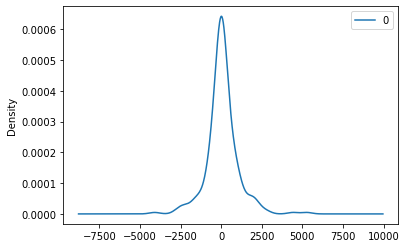

                 0
count   261.000000
mean     77.407429
std     977.447729
min   -4102.448325
25%    -256.344302
50%      17.072360
75%     366.936443
max    5274.160167


In [14]:
# fit model
model = ARIMA(series, order=(40,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

## ARIMA com rolling forecast

### Coloquei o parâmetro q como 5 só para rodar mais rápido!

predicted=50475.193832, expected=50930.000000
predicted=50646.129159, expected=51367.000000
predicted=52042.944115, expected=53032.000000
predicted=53995.496600, expected=54008.000000
predicted=54415.382744, expected=55169.000000
predicted=56542.612074, expected=55810.000000
predicted=56395.890901, expected=58403.000000
predicted=60420.199997, expected=60754.000000
predicted=62094.295673, expected=61830.000000
predicted=62590.252902, expected=62903.000000
predicted=64476.728101, expected=65221.000000
predicted=66921.175006, expected=66366.000000
predicted=66509.667696, expected=66313.000000
predicted=66549.729088, expected=67478.000000
predicted=68962.963456, expected=70010.000000
predicted=71314.476623, expected=72362.000000
predicted=73600.541137, expected=74638.000000
predicted=76898.545642, expected=77698.000000
predicted=80573.824541, expected=81202.000000
predicted=83834.214232, expected=80935.000000
predicted=80345.991225, expected=81628.000000
predicted=83406.014483, expected=8

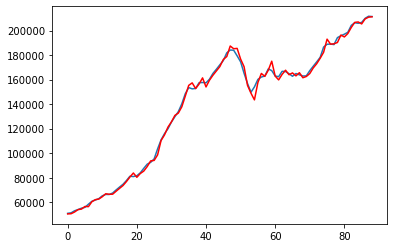

In [18]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()